# Лабораторная работа №8

**Тема: "Фильтрация и свертка"**

Работу выполнил

студент группы 5130901/20201

Нестеренко Сергей Андреевич

---

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

## Упражнение 8.1

В блокноте `chap08.ipynb` автор приводит пример сглаживания курса акций Facebook* и пилообразного сигнала при помощи алгоритма скользящего среднего. Рассматривается преимущество гауссова окна в качестве фильтра НЧ по сравнению с прямоугольным окном. Также рассматривается применение теоремы о свертке для расчета свертки и автокорреляции через БПФ.

\* Компания Meta признана экстремистской организацией, её деятельность в России запрещена, а также принадлежащие ей социальные сети Facebook и Instagram запрещены в России.

## Упражнение 8.2

Построим гауссову кривую:

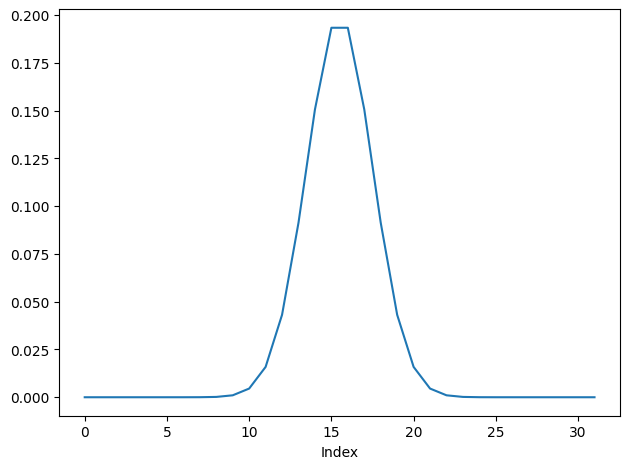

In [3]:
import scipy.signal

gaussian = scipy.signal.windows.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Index')

Получим БПФ от гауссовой кривой:

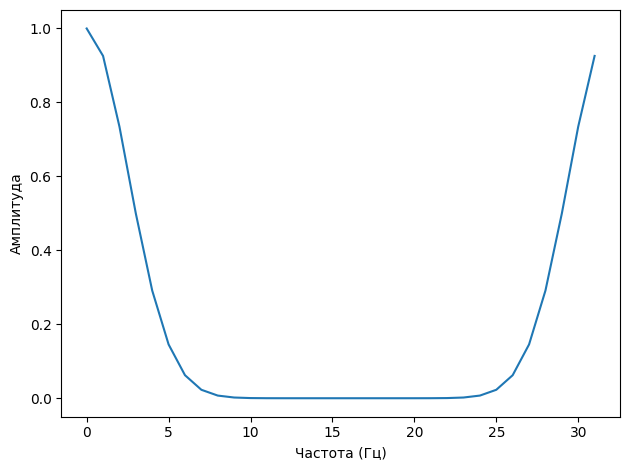

In [4]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Частота (Гц)', ylabel='Амплитуда')

Заметим, что если циклически сдвинуть значения, снова получим гауссову кривую, что соответствует утверждению о том, что преобразование Фурье от гауссовой кривой также является гауссовой кривой.

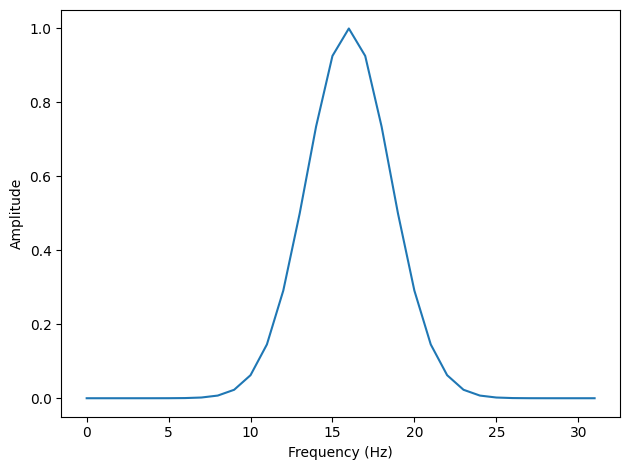

In [5]:

N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Напишем функцию, которая выводит график исходной гауссовой кривой и её циклически смещённое преобразование Фурье.

In [20]:

def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.windows.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

Создадим виджет, позволяющий изменять ширину гауссова окна `std` и наблюдать изменения.

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

Заметим, что при увеличении `std` кривая, полученная преобразованием Фурье, сжимается, в то время как исходная -- расширяется.

## Упражнение 8.3

Создадим прямоугольный сигнал длительностью 1 секунда.

In [10]:
from thinkdsp import SquareSignal

signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

Создадим гауссово окно и окно Хемминга одинаковых размеров.

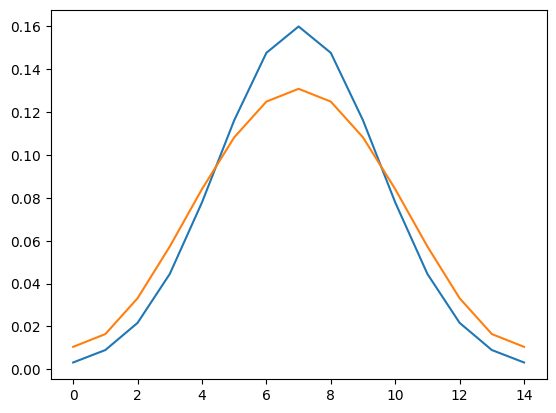

In [15]:
M = 15
std = 2.5

gaussian = scipy.signal.windows.gaussian(M=M, std=std)   
hamming = np.hamming(M)

gaussian /= sum(gaussian)
hamming /= sum(hamming)

plt.plot(gaussian, label='gaussian')
plt.plot(hamming, label='hamming')

Дополним окна нулями и напечатаем их ДПФ. Также выведем график с логарифмической осью y.

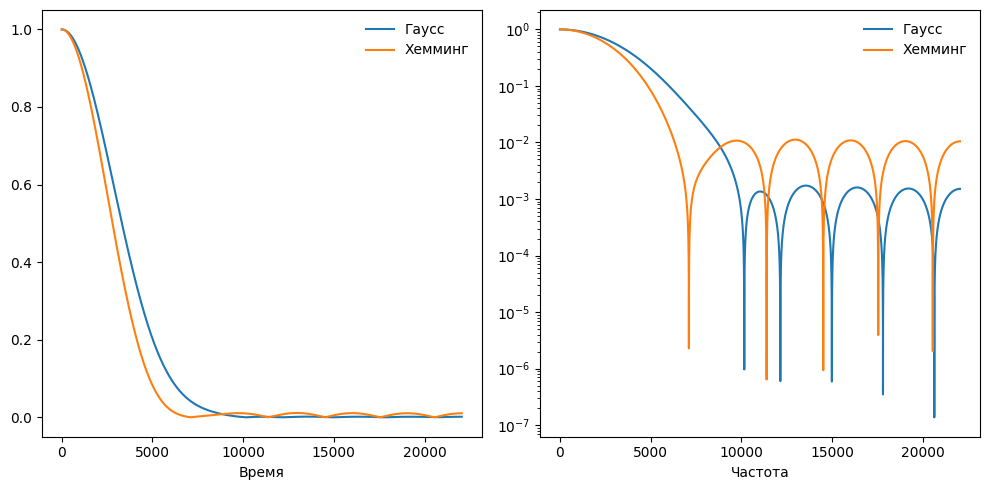

In [ ]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

plt.figure(figsize=(10, 5))

padded1 =  zero_pad(gaussian, len(wave))
padded2 =  zero_pad(hamming, len(wave))
dft_window1 = np.fft.rfft(padded1)
dft_window2 = np.fft.rfft(padded2)

plt.subplot(1, 2, 1)
plt.plot(abs(dft_window1), label='Гаусс')
plt.plot(abs(dft_window2), label='Хемминг')
decorate(xlabel='Время')

plt.subplot(1, 2, 2)
plt.plot(abs(dft_window1), label='Гаусс')
plt.plot(abs(dft_window2), label='Хемминг')
decorate(xlabel='Частота', yscale='log')

plt.show()

Из результато видно, что они выглядят очень похоже, но окно Хемминга спадает быстрее, чем гауссово.